**Варіант №1**

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC

**Завдання 1**

1. Завантажте вбудований датасет load_breast_cancer з бібліотеки
sklearn.datasets.

In [2]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

data = load_breast_cancer()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


2. Проведіть попередній аналіз даних:
    1. Перегляньте перші кілька рядків.
    2. Перевірте назви стовпців та типи даних.
    3. Перевірте наявність пропущених значень.
    4. Досліджуйте розмір даних

In [6]:
print("Перші 5 рядків:")
df.head()


Перші 5 рядків:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
print("\nНазви стовпців і типи даних:")
df.dtypes


Назви стовпців і типи даних:


,0
mean radius,float64
mean texture,float64
mean perimeter,float64
mean area,float64
mean smoothness,float64
mean compactness,float64
mean concavity,float64
mean concave points,float64
mean symmetry,float64
mean fractal dimension,float64


In [8]:
print("\nПропущені значення:")
df.isnull().sum()


Пропущені значення:


,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [9]:
print("\nРозмір даних:")
df.shape


Розмір даних:


(569, 31)

2. Побудова і налаштування моделей:
    1. Розділіть дані на навчальний і тестовий набори.
    2. Побудуйте три моделі класифікації (на власний вибір),
    наприклад:
        1. Логістична регресія.
        2. Дерево рішень.
        3. Випадковий ліс (Random Forest).
    3. Підберіть оптимальні параметри для кожної моделі за допомогою
GridSearchCV (можна вибрати інший оптимізатор).

Розділіть дані на навчальний і тестовий набори.

In [17]:
from sklearn.model_selection import train_test_split

X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Розмір навчального набору (X_train):", X_train.shape)
print("Розмір тестового набору (X_test):", X_test.shape)
print("Розмір навчальних міток (y_train):", y_train.shape)
print("Розмір тестових міток (y_test):", y_test.shape)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Розмір навчального набору (X_train): (398, 30)
Розмір тестового набору (X_test): (171, 30)
Розмір навчальних міток (y_train): (398,)
Розмір тестових міток (y_test): (171,)


Логістична регресія

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

logreg = LogisticRegression(max_iter=1000)

logreg_params = {
    'C': [0.1, 1, 10],
    'penalty': ['l2']
}

logreg_grid = GridSearchCV(logreg, logreg_params, cv=5)
logreg_grid.fit(X_train, y_train)
logreg_best = logreg_grid.best_estimator_
y_pred = logreg_best.predict(X_test)

print("Точність на тестовому наборі: ", accuracy_score(y_test, y_pred))
print("Найкращі параметри: ", logreg_grid.best_params_)


Точність на тестовому наборі:  0.9824561403508771
Найкращі параметри:  {'C': 1, 'penalty': 'l2'}


Дерево рішень

In [23]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree = DecisionTreeClassifier(random_state=42)

tree_params = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

tree_grid = GridSearchCV(tree, tree_params, cv=5)
tree_grid.fit(X_train, y_train)
tree_best = tree_grid.best_estimator_

y_pred_tree = tree_best.predict(X_test)

print("Точність дерева рішень на тестовому наборі: ", accuracy_score(y_test, y_pred_tree))
print("Найкращі параметри для дерева рішень: ", tree_grid.best_params_)

Точність дерева рішень на тестовому наборі:  0.9649122807017544
Найкращі параметри для дерева рішень:  {'max_depth': 3, 'min_samples_split': 2}


Випадковий ліс (Random Forest)

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(random_state=42)
rf_params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid = GridSearchCV(rf, rf_params, cv=5)
rf_grid.fit(X_train, y_train)
rf_best = rf_grid.best_estimator_
y_pred_rf = rf_best.predict(X_test)

print("Точність випадкового лісу на тестовому наборі: ", accuracy_score(y_test, y_pred_rf))
print("Найкращі параметри для випадкового лісу: ", rf_grid.best_params_)


Точність випадкового лісу на тестовому наборі:  0.9707602339181286
Найкращі параметри для випадкового лісу:  {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}


Підберіть оптимальні параметри для кожної моделі за допомогою
GridSearchCV (можна вибрати інший оптимізатор).

In [30]:
svm = SVC()
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

svm_grid = GridSearchCV(svm, svm_params, cv=5)
svm_grid.fit(X_train, y_train)
svm_best = svm_grid.best_estimator_

models = {'Logistic Regression': logreg_best, 'Decision Tree': tree_best, 'SVM': svm_best}

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy}")

Logistic Regression Accuracy: 0.9824561403508771
Decision Tree Accuracy: 0.9649122807017544
SVM Accuracy: 0.9824561403508771


In [31]:
import pandas as pd

best_params = {
    'Model': ['Logistic Regression', 'Decision Tree', 'SVM'],
    'Best Parameters': [
        logreg_grid.best_params_,
        tree_grid.best_params_,
        svm_grid.best_params_
    ]
}
best_params_df = pd.DataFrame(best_params)
best_params_df

,Model,Best Parameters
0,Logistic Regression,"{'C': 1, 'penalty': 'l2'}"
1,Decision Tree,"{'max_depth': 3, 'min_samples_split': 2}"
2,SVM,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}"


3. Оцініть моделі. Виведіть точність (accuracy) – обов’язково, матрицю
помилок (confusion matrix) – за вибором та звіт про класифікацію
(classification report) для кожної моделі

In [34]:
for model_name, model in models.items():
    print(f"Model: {model_name}")
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    print('-' * 60)

Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.97      0.98      0.98        63
           1       0.99      0.98      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

------------------------------------------------------------
Model: Decision Tree
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        63
           1       0.96      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

------------------------------------------------------------
Model: Random Forest
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98   

Model: Logistic Regression
Accuracy: 0.9825
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98        63
           1       0.99      0.98      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



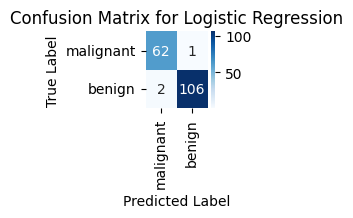

------------------------------------------------------------
Model: Decision Tree
Accuracy: 0.9649
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        63
           1       0.96      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



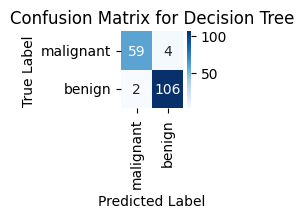

------------------------------------------------------------
Model: Random Forest
Accuracy: 0.9708
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



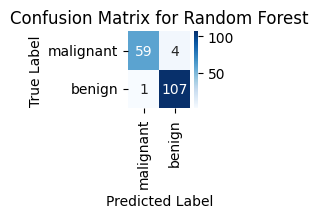

------------------------------------------------------------
Model: SVM
Accuracy: 0.9825
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98        63
           1       0.98      0.99      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



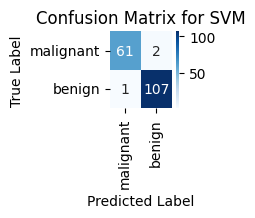

------------------------------------------------------------


In [37]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

models = {
    'Logistic Regression': logreg_best,
    'Decision Tree': tree_best,
    'Random Forest': rf_best,
    'SVM': svm_best
}

for model_name, model in models.items():
    print(f"Model: {model_name}")

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(1, 1))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    print('-' * 60)


4. Прогнозування і висновки
    1. Оберіть найкращу модель на основі метрик продуктивності.
    2. Зробіть прогноз на тестовій вибірці.
    3. Виведіть результати прогнозування.

In [43]:
import numpy as np

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

best_params = {'C': 0.1, 'penalty': 'l2'}
logreg = LogisticRegression(**best_params, max_iter=1000)
logreg.fit(X_train, y_train)

np.random.seed(42)
random_indices = np.random.choice(X_test.shape[0], 10, replace=False)
X_random = X_test[random_indices]
y_random_actual = y_test[random_indices]

y_random_pred = logreg.predict(X_random)

comparison_df = pd.DataFrame({
    'Sample Index': random_indices,
    'Real Class': y_random_actual,
    'Predicted Class': y_random_pred
})

comparison_df

,Sample Index,Real Class,Predicted Class
0,101,1,1
1,55,1,1
2,56,1,1
3,139,0,0
4,157,1,1
5,78,1,1
6,135,0,0
7,104,1,1
8,109,1,1
9,108,1,1


**ВИСНОВОК**

Найкраща модель на основі метрик продуктивності: логістична регресія і SVM мають найвищу точність (0.9825)

Модель логістичної регресії правильно передбачила класи для всіх 10 випадкових зразків з тестової вибірки. Це свідчить про високу точність моделі на цих зразках.

**Завдання 2**

Завантажуємо датасет **titanic.csv**

In [45]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC

In [93]:
import pandas as pd

from google.colab import files
uploaded = files.upload()

Saving titanic.csv to titanic (1).csv


In [94]:
df = pd.read_csv('titanic (2).csv')

print("Перші 5 рядків датасету:")
df.head()

Перші 5 рядків датасету:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [95]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [96]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1


In [97]:
df.shape

(418, 12)

In [100]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

df = pd.read_csv('titanic.csv')

X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = df['Survived']

X = pd.get_dummies(X, columns=['Sex', 'Embarked'], drop_first=True)
imputer = SimpleImputer(strategy='mean')
X[['Age', 'Fare']] = imputer.fit_transform(X[['Age', 'Fare']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Розмір навчального набору (X_train):", X_train.shape)
print("Розмір тестового набору (X_test):", X_test.shape)
print("Розмір навчальних міток (y_train):", y_train.shape)
print("Розмір тестових міток (y_test):", y_test.shape)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



Розмір навчального набору (X_train): (292, 8)
Розмір тестового набору (X_test): (126, 8)
Розмір навчальних міток (y_train): (292,)
Розмір тестових міток (y_test): (126,)


Логістична регресія

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

logreg = LogisticRegression(max_iter=1000)

logreg_params = {
    'C': [0.1, 1, 10],
    'penalty': ['l2']
}

logreg_grid = GridSearchCV(logreg, logreg_params, cv=5)
logreg_grid.fit(X_train, y_train)
logreg_best = logreg_grid.best_estimator_
y_pred = logreg_best.predict(X_test)

print("Точність на тестовому наборі: ", accuracy_score(y_test, y_pred))
print("Найкращі параметри: ", logreg_grid.best_params_)

Точність на тестовому наборі:  1.0
Найкращі параметри:  {'C': 0.1, 'penalty': 'l2'}


Дерево рішень

In [103]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree = DecisionTreeClassifier(random_state=42)

tree_params = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

tree_grid = GridSearchCV(tree, tree_params, cv=5)
tree_grid.fit(X_train, y_train)
tree_best = tree_grid.best_estimator_

y_pred_tree = tree_best.predict(X_test)

print("Точність дерева рішень на тестовому наборі: ", accuracy_score(y_test, y_pred_tree))
print("Найкращі параметри для дерева рішень: ", tree_grid.best_params_)

Точність дерева рішень на тестовому наборі:  1.0
Найкращі параметри для дерева рішень:  {'max_depth': 3, 'min_samples_split': 2}


Метод опорних векторів (SVM)

In [104]:
svm = SVC()
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

svm_grid = GridSearchCV(svm, svm_params, cv=5, n_jobs=-1)
svm_grid.fit(X_train, y_train)
svm_best = svm_grid.best_estimator_

# Оцінка моделі
y_pred_svm = svm_best.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_report = classification_report(y_test, y_pred_svm)
svm_best_params = svm_grid.best_params_

print("Точність SVM на тестовому наборі: ", svm_accuracy)
print("Найкращі параметри для SVM: ", svm_best_params)
print("Звіт класифікації для SVM:")
print(svm_report)

Точність SVM на тестовому наборі:  1.0
Найкращі параметри для SVM:  {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Звіт класифікації для SVM:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



Оцінка моделей


In [105]:
import pandas as pd

best_params = {
    'Model': ['Logistic Regression', 'Decision Tree', 'SVM'],
    'Best Parameters': [
        logreg_grid.best_params_,
        tree_grid.best_params_,
        svm_grid.best_params_
    ]
}
best_params_df = pd.DataFrame(best_params)
best_params_df

,Model,Best Parameters
0,Logistic Regression,"{'C': 0.1, 'penalty': 'l2'}"
1,Decision Tree,"{'max_depth': 3, 'min_samples_split': 2}"
2,SVM,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}"


Виведіть точність (accuracy) – обов’язково, матрицю помилок (confusion matrix) – за вибором та звіт про класифікацію (classification report) для кожної моделі

In [106]:
for model_name, model in models.items():
    print(f"Model: {model_name}")
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    print('-' * 60)

Model: Logistic Regression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

------------------------------------------------------------
Model: Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

------------------------------------------------------------
Model: SVM
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

 

Model: Logistic Regression
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



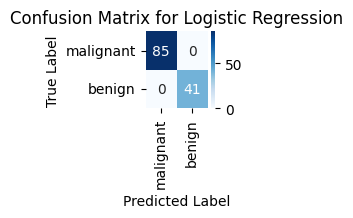

------------------------------------------------------------
Model: Decision Tree
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



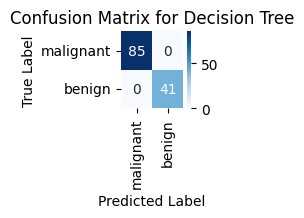

------------------------------------------------------------
Model: SVM
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



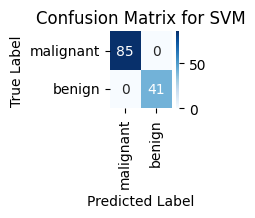

------------------------------------------------------------


In [110]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

models = {
    'Logistic Regression': logreg_best,
    'Decision Tree': tree_best,
    'SVM': svm_best
}

for model_name, model in models.items():
    print(f"Model: {model_name}")

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(1, 1))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    print('-' * 60)

Прогнозування

In [109]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

best_params = {'C': 0.1, 'penalty': 'l2'}
logreg = LogisticRegression(**best_params, max_iter=1000)
logreg.fit(X_train, y_train)

np.random.seed(42)
random_indices = np.random.choice(X_test.shape[0], 10, replace=False)

X_random = X_test[random_indices]
y_random_actual = y_test.iloc[random_indices]

# Прогнозування
y_random_pred = logreg.predict(X_random)

comparison_df = pd.DataFrame({
    'Sample Index': random_indices,
    'Real Class': y_random_actual.values,
    'Predicted Class': y_random_pred
})

comparison_df


,Sample Index,Real Class,Predicted Class
0,73,1,1
1,19,0,0
2,116,1,1
3,67,0,0
4,94,0,0
5,77,1,1
6,31,1,1
7,53,0,0
8,117,0,0
9,44,0,0


**ВИСНОВОК**

Для датасету titanic логістична регресія, дерево рішень і SVM працюють з точністю 100%. Вибірка з 10 випадків правильно передбачила класи зі всіма моделями. Оскільки всі моделі показали однакові результати, будь-яка з них може бути використана.